In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.regression import LinearRegression
import pandas as pd

In [2]:
from pyspark.sql import HiveContext

In [3]:
#Create a Spark session which is Hive enabled...
spark = SparkSession.builder \
.appName("ReadingFromHive") \
.master("local") \
.enableHiveSupport() \
.getOrCreate()


In [5]:
hc = HiveContext(spark)
df2 = hc.sql("select * from boston.boston")
df2.show(5)


+-----------+----+-----------+----+-----------+-----------+-----------+-----------+----+----+-----------+-----------+-----------+-----------+
|       crim|  zn|      indus|chas|        nox|         rm|        age|        dis| rad| tax|         pt|          b|      lstat|         mv|
+-----------+----+-----------+----+-----------+-----------+-----------+-----------+----+----+-----------+-----------+-----------+-----------+
|       null|null|       null|null|       null|       null|       null|       null|null|null|       null|       null|       null|       null|
|    0.00632|18.0|2.309999943|   0|0.537999988|6.574999809|65.19999695|4.090000153|   1| 296|15.30000019|396.8999939|4.980000019|       24.0|
|0.027310001| 0.0|7.070000172|   0|0.469000012|6.421000004|78.90000153|4.967100143|   2| 242|17.79999924|396.8999939|9.140000343|21.60000038|
|    0.02729| 0.0|7.070000172|   0|0.469000012|7.184999943|61.09999847|4.967100143|   2| 242|17.79999924|392.8299866| 4.03000021|34.70000076|
|0.032

In [8]:
# Count of rows and columns
print('rows :',df2.count())
print('Columns:',len(df2.columns))

rows : 507
Columns: 14


In [9]:
# Dropping Null Values
df=df2.na.drop()

In [10]:
df.count()

506

In [11]:
# Schema of dataset
df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- pt: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- mv: double (nullable = true)



In [12]:
# Creating pandas dataframe to find co-relation
df_pd=df.toPandas()

In [13]:
# Finding Co-relation
df_pd.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt,b,lstat,mv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [14]:
df_pd.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,pt,b,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [17]:
# Creating machine Learning Model-Regression Model
from pyspark.ml.feature import VectorAssembler # For creating vectors of features
vec_assembler=VectorAssembler(inputCols=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','pt','b','lstat'],outputCol='features')

In [18]:
feature_df=vec_assembler.transform(df)

In [19]:
feature_df.printSchema()

root
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- pt: double (nullable = true)
 |-- b: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- mv: double (nullable = true)
 |-- features: vector (nullable = true)



In [21]:
model_df=feature_df.select('features','mv')
model_df.show(5)

+--------------------+-----------+
|            features|         mv|
+--------------------+-----------+
|[0.00632,18.0,2.3...|       24.0|
|[0.027310001,0.0,...|21.60000038|
|[0.02729,0.0,7.07...|34.70000076|
|[0.032370001,0.0,...|33.40000153|
|[0.069049999,0.0,...|36.20000076|
+--------------------+-----------+
only showing top 5 rows



In [22]:
print(model_df.count(),len(model_df.columns))

506 2


In [23]:
train_df,test_df=model_df.randomSplit([0.7,0.3])

In [24]:
lin_reg=LinearRegression(labelCol='mv')
lr_model=lin_reg.fit(train_df)

In [25]:
print(lr_model.intercept)

41.9292101356909


In [26]:
print(lr_model.coefficients)

[-0.10811272325011746,0.04682304575504549,0.005749947073483592,3.690063800455836,-18.818569638783796,3.3291922049482334,-2.616569518998253e-05,-1.5315022156358304,0.32799875525419353,-0.012012859719678266,-1.033399686210613,0.008948165897951308,-0.5259969298602896]


In [28]:
train_prediction=lr_model.evaluate(train_df)
print('R2 Score of Train model:',train_prediction.r2)
print('RMSE of train Model:',train_prediction.rootMeanSquaredError)

R2 Score of Train model: 0.73038669087172
RMSE of train Model: 4.830439832873445


In [29]:
test_result=lr_model.evaluate(test_df)
print('R2 Score of test data:',test_result.r2)
print('RMSE of test data :',test_result.rootMeanSquaredError)

R2 Score of test data: 0.7588999098633357
RMSE of test data : 4.36281708235945


In [30]:
test_result.residuals.show(5)

+--------------------+
|           residuals|
+--------------------+
|   2.572499144086514|
|  4.9374431103171545|
|-0.03839064449918084|
|   7.122126835710098|
| -0.2087408011537093|
+--------------------+
only showing top 5 rows



In [34]:
prediction_df=train_prediction.predictions.select('mv','prediction').toPandas()

In [35]:
prediction_df.sample(5)

,mv,prediction
292,16.1,21.910203
218,18.1,16.872274
106,32.0,33.755440
253,15.6,16.193875
170,15.0,19.134328


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


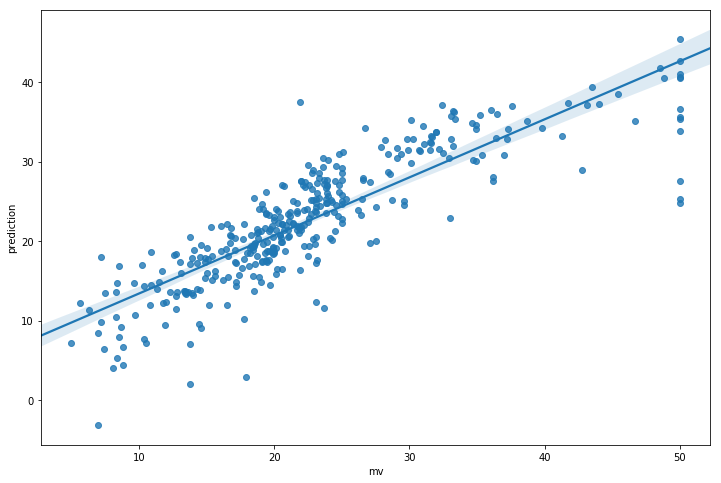

In [39]:
plt.figure(figsize=(12,8))
sns.regplot(x='mv',y='prediction',data=prediction_df)
plt.show()

/usr/local/lib/python3.4/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


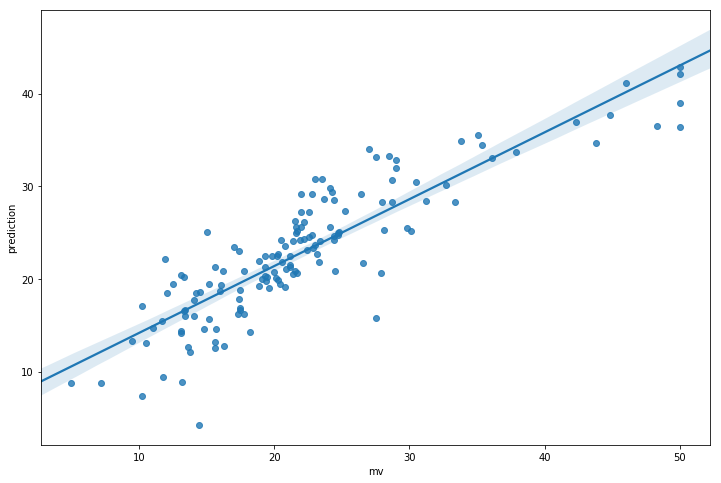

In [40]:
# For test data
test_prediction_df=test_result.predictions.select('mv','prediction').toPandas()
plt.figure(figsize=(12,8))
sns.regplot(x='mv',y='prediction',data=test_prediction_df)
plt.show()